**DEEPIKA 23/5051  ❄**



**Project Objective**
The primary objective of this project is to analyze Zomato restaurant data to help the community discover high-quality dining options and the best cuisines in their area. By analyzing ratings, reviews, average costs, and other relevant indicators, this project aims to provide insights into restaurant quality across different cuisines and cities, making it easier for users to find top-rated dining experiences.

**Dataset Source**
The dataset used in this project is sourced from Kaggle, specifically the Zomato Restaurant Dataset. This dataset provides extensive information about various restaurants globally, including ratings, cuisine types, average costs, and other useful attributes for analysis. You can access and download the dataset directly from Kaggle at the following link: Kaggle - Zomato Restaurant Dataset.

**Introduction**
Dining out has become an integral part of many cultures, with people seeking diverse cuisines and memorable dining experiences. The challenge, however, lies in identifying the best restaurants, especially when preferences for cuisine, quality, and cost vary widely.

This project leverages the Zomato dataset to simplify the process of finding high-quality restaurants. By analyzing detailed restaurant information—including ratings, cuisines, costs, and locations—the project aims to uncover valuable insights that guide users in making informed dining decisions. The analysis will reveal trends in restaurant quality by cuisine and region, allowing users to find popular and well-rated restaurants with ease.

**Acknowledgment**
I would like to express my gratitude to **Anuradha Ma'am** for her guidance and support throughout this project. This project has greatly enhanced my understanding of data cleaning, preprocessing, and analysis techniques, and I am excited to apply these skills in future data science endeavors.




In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
path="/content/zomato.csv"
df=pd.read_csv(path, encoding='latin-1')
# Initial Dataset Inspection
df.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
# Initial Dataset Inspection
print(df.head())
print(df.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

**Data Cleaning**
1. **Handle Missing Values**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'Cuisines' with 'Unknown' and drop rows with critical missing values in 'Aggregate rating'
df['Cuisines'].fillna('Unknown', inplace=True)
df.dropna(subset=['Aggregate rating'], inplace=True)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


<ipython-input-11-2072a4574f35>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


2.*** Remove Duplicates***
Identify and remove any duplicate restaurant entries.

In [ ]:
# Drop duplicates based on 'Restaurant ID'
df.drop_duplicates(subset='Restaurant ID', keep='first', inplace=True)
print("Duplicates removed, remaining rows:", df.shape[0])


Duplicates removed, remaining rows: 9551


3. **Handle Inconsistent Currency Format**
If multiple currencies exist, standardize them for ease of analysis (optional, as currency may depend on location).

In [ ]:
# Standardize Currency if required, e.g., convert all to a single currency or handle inconsistencies
df['Currency'] = df['Currency'].str.replace('Botswana Pula(P)', 'Pula')  # Example replacement


4.**Remove Redundant Columns**
Check if columns like Locality and Locality Verbose provide duplicate information.

In [ ]:
# Drop 'Locality Verbose' if 'Locality' has similar data
df.drop(columns=['Locality Verbose'], inplace=True)


 **Data Preprocessing**
1. Encode Categorical Columns
Convert categorical values to numerical representations.

In [ ]:
# Encode 'Rating Text' and 'Has Table booking'
df['Rating text'] = df['Rating text'].map({'Excellent': 5, 'Very Good': 4, 'Good': 3, 'Average': 2, 'Poor': 1})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


2. **Feature Transformation**
Convert latitude and longitude to use in spatial clustering.

In [ ]:
# Ensure latitude and longitude are floats for spatial analysis
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)


3.**Standardization / Normalization**
Standardize columns like Average Cost for Two and Votes.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize 'Average Cost for Two' and 'Votes'
scaler = StandardScaler()
df[['Average Cost for two', 'Votes']] = scaler.fit_transform(df[['Average Cost for two', 'Votes']])


4. **Outlier Detection**
Check for outliers in Aggregate rating and Votes.

In [ ]:
# Use Z-score method to detect outliers in 'Votes'
df = df[(np.abs(df['Votes'] - df['Votes'].mean()) / df['Votes'].std()) < 3]


 **Data Analysis and Exploration**
**Analysis Questions**

In [ ]:
# 1. Average rating by cuisine type
avg_rating_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean()
print(avg_rating_cuisine)

# 2. Cities with the highest-rated restaurants
top_cities_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print(top_cities_rating.head())

# 3. Correlation between cost and rating
correlation = df[['Average Cost for two', 'Aggregate rating']].corr()
print("Correlation between average cost and rating:\n", correlation)

# 4. Cuisines with the most votes
votes_by_cuisine = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print(votes_by_cuisine.head())

# 5. Table booking vs. rating
booking_rating = df.groupby('Has Table booking')['Aggregate rating'].mean()
print(booking_rating)

# 6. Price range distribution by city
price_range_city = df.groupby('City')['Price range'].value_counts().unstack()
print(price_range_city)

# 7. Online delivery availability by city
delivery_by_city = df.groupby('City')['Has Online delivery'].mean()
print(delivery_by_city)

# 8. Average rating distribution for currently delivering restaurants
delivering_rating = df[df['Is delivering now'] == 'Yes']['Aggregate rating'].mean()
print("Average rating for delivering restaurants:", delivering_rating)


Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1771, dtype: float64
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64
Correlation between average cost and rating:
                       Average Cost for two  Aggregate rating
Average Cost for two              1.000000          0.048369
Aggregate rating    

**Visualization**

**Visualization Questions**

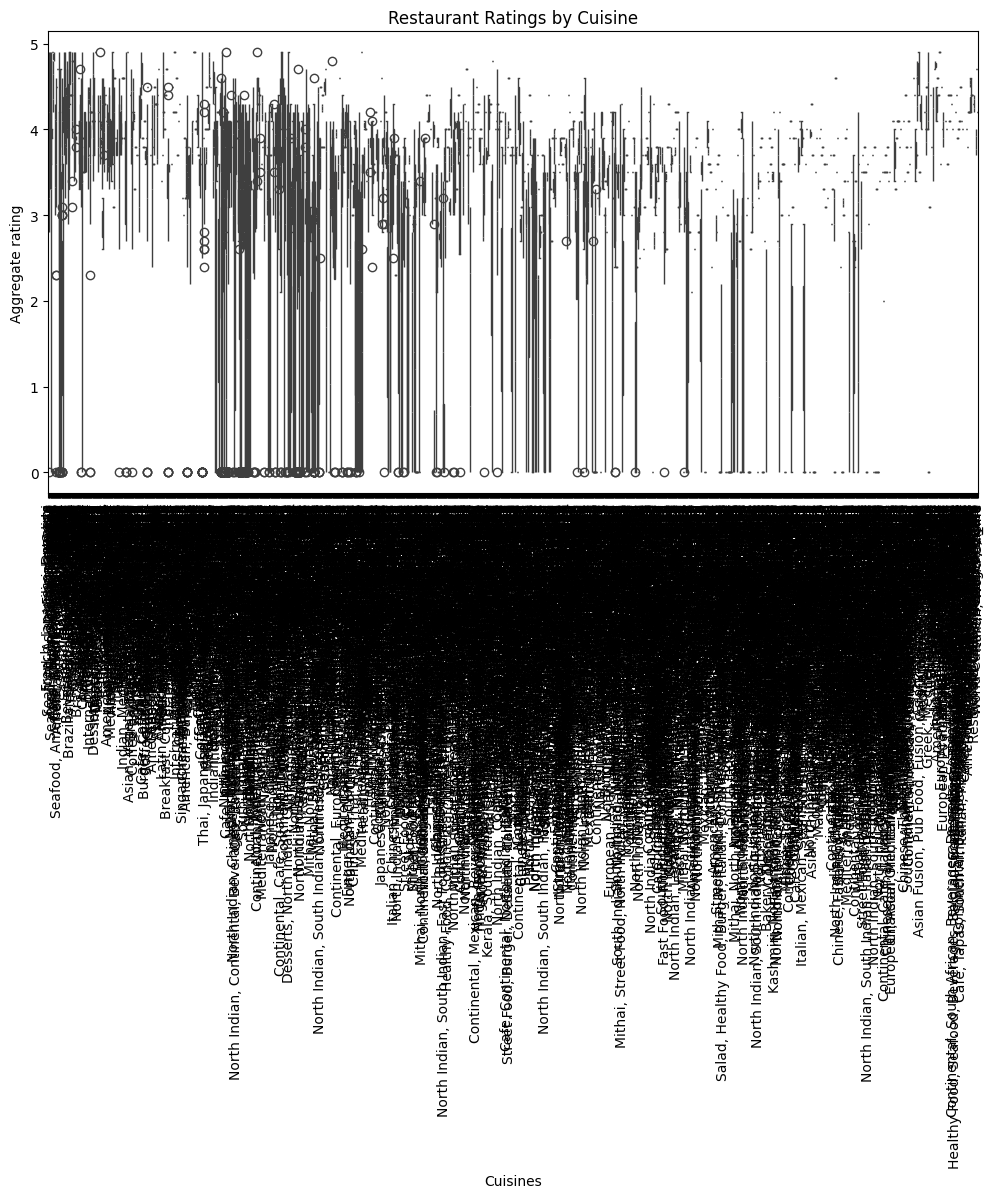

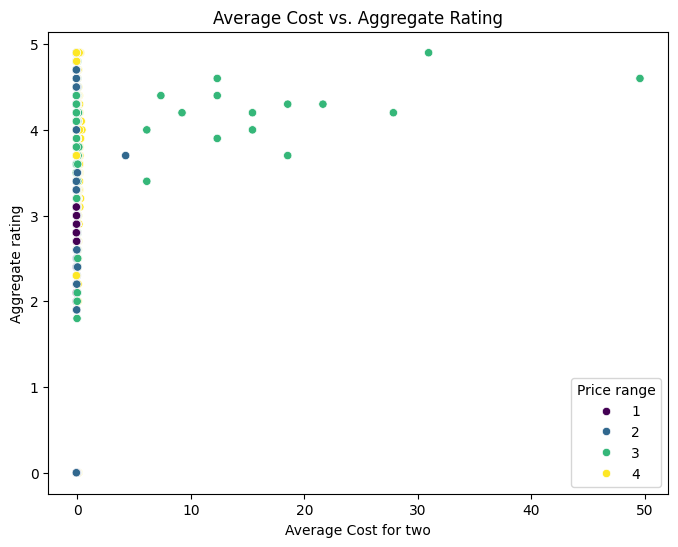

In [ ]:
# 1. Distribution of restaurant ratings by cuisine
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cuisines', y='Aggregate rating')
plt.xticks(rotation=90)
plt.title("Restaurant Ratings by Cuisine")
plt.show()

# 2. Relationship between average cost for two and aggregate rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Average Cost for two', y='Aggregate rating', hue='Price range', palette='viridis')
plt.title("Average Cost vs. Aggregate Rating")
plt.show()


1. **Distribution of Restaurant Ratings by Cuisine (Top 10 Cuisines)**
To make the boxplot more readable, let’s focus on the top 10 cuisines by restaurant count.

python
Copy code


<ipython-input-23-ec1ed1089975>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Cuisines', y='Aggregate rating', palette="Set3")


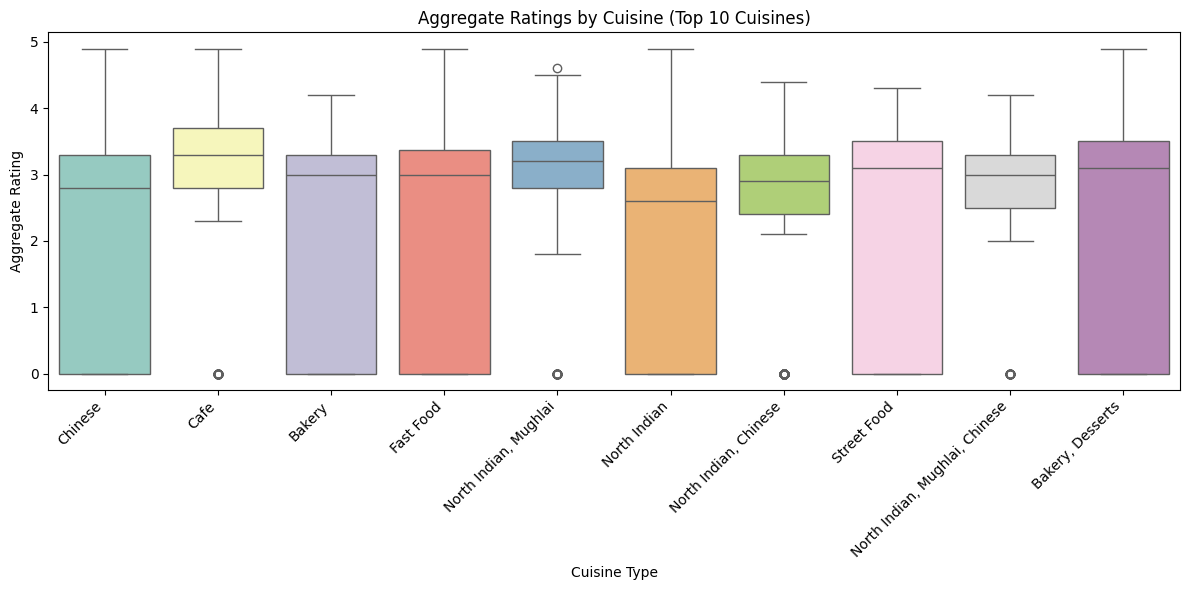

In [ ]:
# Get the top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().nlargest(10).index
filtered_df = df[df['Cuisines'].isin(top_cuisines)]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Cuisines', y='Aggregate rating', palette="Set3")
plt.xticks(rotation=45, ha="right")
plt.title("Aggregate Ratings by Cuisine (Top 10 Cuisines)")
plt.xlabel("Cuisine Type")
plt.ylabel("Aggregate Rating")
plt.tight_layout()
plt.show()


2. **Relationship Between Average Cost for Two and Aggregate Rating**
To avoid crowding, let's use only the top 5 cities by restaurant count and add transparency (alpha) to the points.

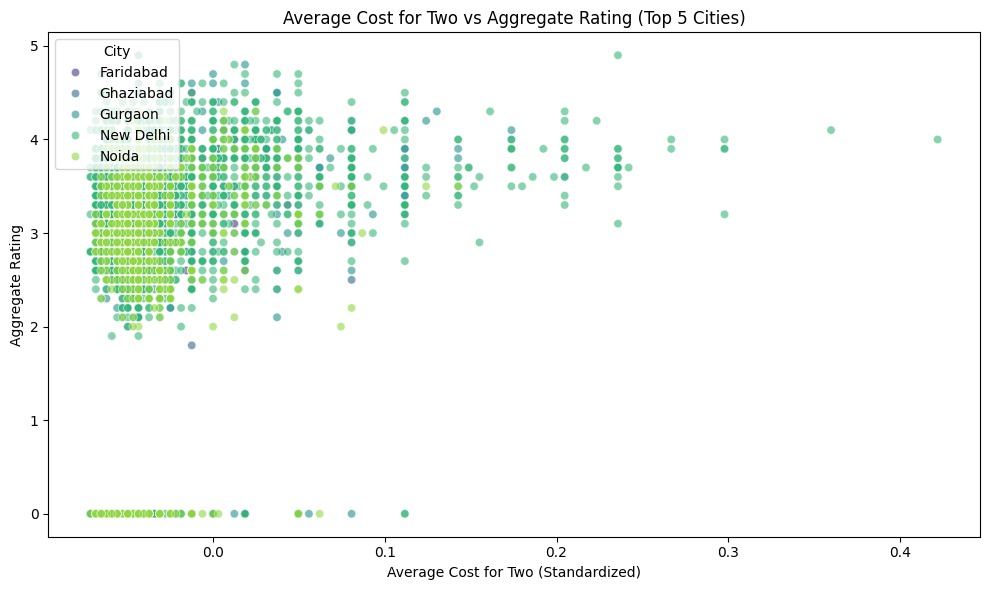

In [ ]:
# Get the top 5 cities with the most restaurants
top_cities = df['City'].value_counts().nlargest(5).index
filtered_df_city = df[df['City'].isin(top_cities)]

# Scatter plot with transparency for overlapping points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df_city, x='Average Cost for two', y='Aggregate rating', hue='City', alpha=0.6, palette="viridis")
plt.title("Average Cost for Two vs Aggregate Rating (Top 5 Cities)")
plt.xlabel("Average Cost for Two (Standardized)")
plt.ylabel("Aggregate Rating")
plt.legend(title="City", loc="upper left")
plt.tight_layout()
plt.show()


**Price Range Distribution by City (Top 5 Cities)**
Using a bar plot instead of value counts for a cleaner overview.

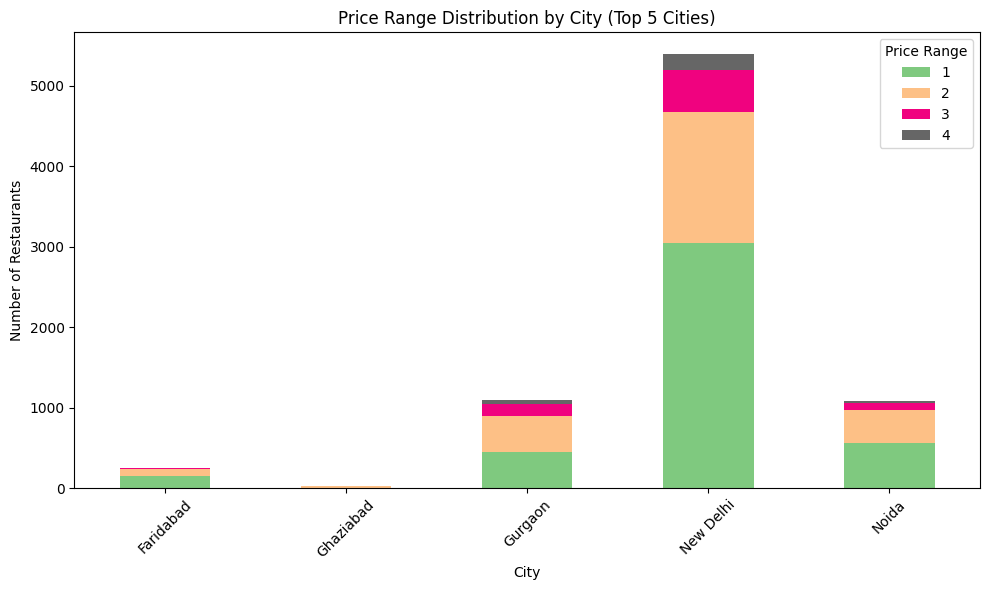

In [ ]:
# Filter data for top 5 cities
price_range_city = filtered_df_city.groupby(['City', 'Price range']).size().unstack().fillna(0)

# Plot
price_range_city.plot(kind='bar', stacked=True, colormap="Accent", figsize=(10, 6))
plt.title("Price Range Distribution by City (Top 5 Cities)")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.legend(title="Price Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Cuisine Rating Distribution:** Shows median ratings for the top 10 cuisines, helping you compare which cuisines generally receive higher ratings.
**Cost vs. Rating:** Offers a more readable comparison of cost and rating trends in the top 5 cities.
**Price Range Distribution: **Displays how different price ranges are distributed within popular cities, showing how cities might cater to different budgets.

1. **Heatmaps for Correlation Analysis**
A heatmap can reveal correlations between numeric variables, such as cost, rating, and votes. This approach will give you an overview of how these factors interrelate.

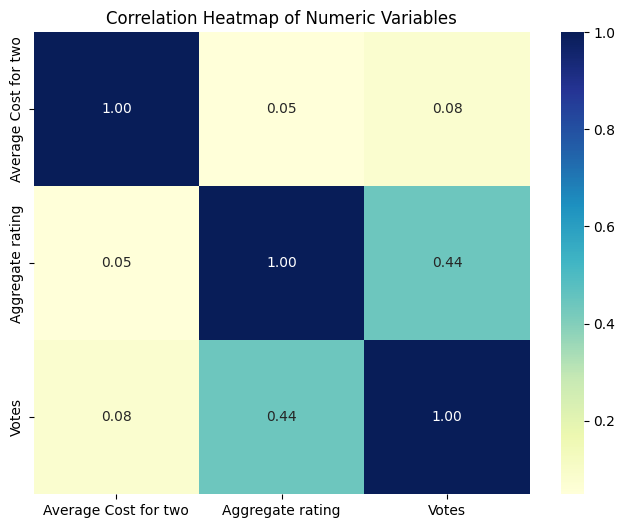

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Average Cost for two', 'Aggregate rating', 'Votes']].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


2. **Bubble Plot for Cost vs. Rating, Sized by Votes**
A bubble plot is a good way to visualize three variables simultaneously. You can plot Average Cost for Two on the x-axis, Aggregate Rating on the y-axis, and use Votes as the bubble size.

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


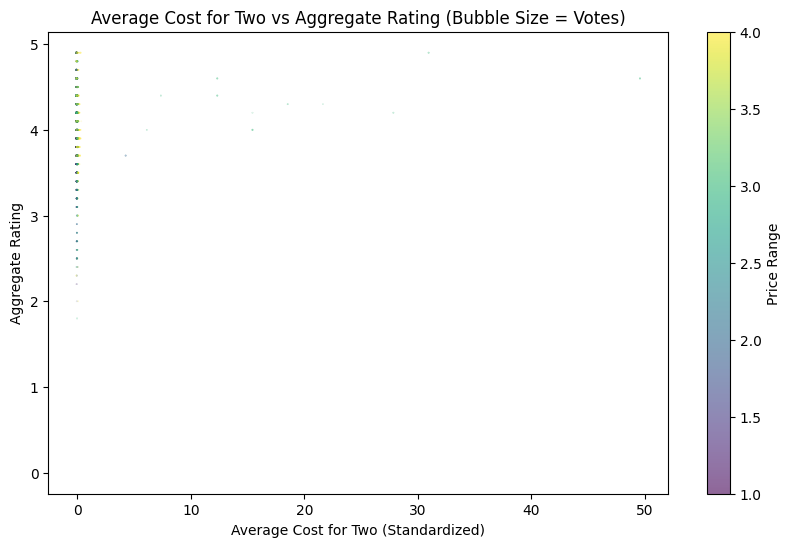

In [ ]:
# Bubble plot for Average Cost vs Rating with Votes as bubble size
plt.figure(figsize=(10, 6))
plt.scatter(data=df, x='Average Cost for two', y='Aggregate rating',
            s=df['Votes']*0.1, alpha=0.6, c=df['Price range'], cmap="viridis")
plt.colorbar(label='Price Range')
plt.title("Average Cost for Two vs Aggregate Rating (Bubble Size = Votes)")
plt.xlabel("Average Cost for Two (Standardized)")
plt.ylabel("Aggregate Rating")
plt.show()


3. **Geospatial Heatmap for Restaurant Density by City**
This is useful if you want to see restaurant density visually by location. You can use libraries like Folium to plot geolocations.

In [ ]:
import folium

# Create a map centered around a mean location
center_lat, center_long = df['Latitude'].mean(), df['Longitude'].mean()
map = folium.Map(location=[center_lat, center_long], zoom_start=12)

# Add points to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map)

map  # This will display the map in Google Colab or Jupyter Notebook


4. **Bar Plot for Average Rating by Price Range**
This plot will help show if higher price ranges correlate with better ratings.

<ipython-input-30-49fd0a5fb900>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette="coolwarm")


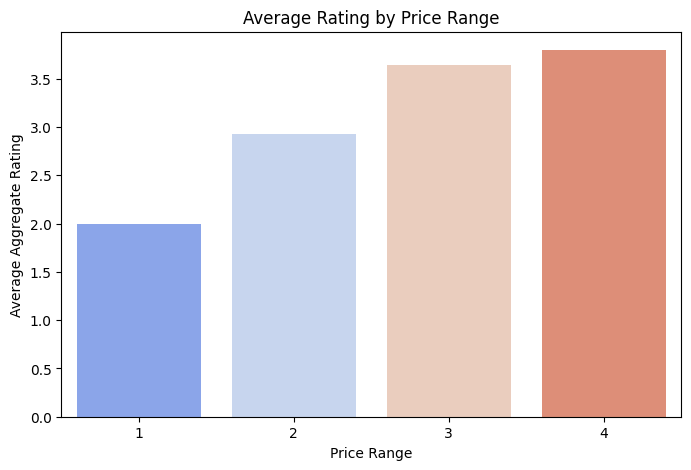

In [ ]:
# Average rating by price range
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette="coolwarm")
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Aggregate Rating")
plt.show()


5. **Word Cloud for Popular Cuisines**
A word cloud is a creative way to visualize which cuisines are most common. You may need to install the wordcloud library first.

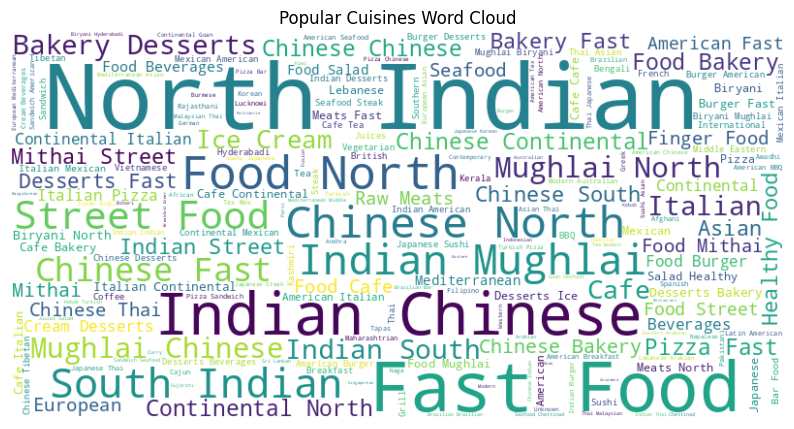

In [ ]:
from wordcloud import WordCloud

# Combine all cuisine types into a single string
cuisines_text = ' '.join(df['Cuisines'].dropna().tolist())

# Generate the word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisines_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Cuisines Word Cloud")
plt.show()


6.** Boxen Plot for Rating Distribution Across Top Cities**
A boxenplot in Seaborn is great for showing data distribution across multiple categories, especially if you have many data points.

<ipython-input-32-d6a53caea570>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=filtered_df_city, x='City', y='Aggregate rating', palette="Set2")


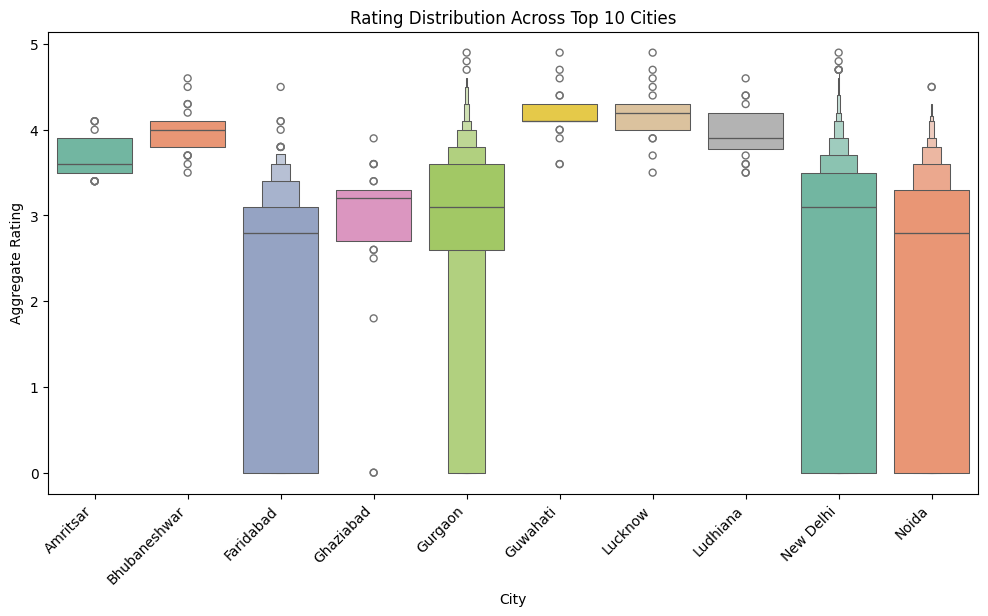

In [ ]:
# Boxen plot for rating distribution by city (Top 10 Cities)
top_cities = df['City'].value_counts().nlargest(10).index
filtered_df_city = df[df['City'].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.boxenplot(data=filtered_df_city, x='City', y='Aggregate rating', palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Rating Distribution Across Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Aggregate Rating")
plt.show()
